In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
from src import AFDB_tools, treescore , foldseek2tree
import pandas as pd
import torch

In [3]:
from src import AFDB_tools
import os
import shutil
import random
import wget
import glob
from tqdm import tqdm

In [31]:
#copy all identifier files to make a zenodo copy

outpath = '../OMA_data/'
zenodopath = '../zenodo/OMA_data/'

clades = glob.glob(outpath +'*/')


for clade in clades:
    print(clade.split('/')[-2])
    fams = glob.glob(clade+'*/')
    try:
        os.mkdir(zenodopath + clade.split('/')[-2])
    except FileExistsError:
        print('exists')
        
    
    print(len(fams))
    for fam in tqdm(fams):
        try:
            os.mkdir(zenodopath +'/'.join(fam.split('/')[2:-1]) )        
        except FileExistsError:
            pass
        try:
            shutil.copy( fam + 'identifiers.txt', zenodopath+ '/'.join(fam.split('/')[2:-1]) +'/identifiers.txt' )
        except FileNotFoundError:
            print('err',fam) 
            

logs
0


0it [00:00, ?it/s]


Bacteria
501


 10%|▉         | 50/501 [00:00<00:03, 113.11it/s]

err ../OMA_data/Bacteria/logs/


100%|██████████| 501/501 [00:03<00:00, 148.89it/s]


LUCA
501


 10%|█         | 52/501 [00:00<00:03, 128.57it/s]

err ../OMA_data/LUCA/logs/


100%|██████████| 501/501 [00:04<00:00, 106.25it/s]


Euteleostomi
501


 10%|▉         | 48/501 [00:00<00:02, 154.74it/s]

err ../OMA_data/Euteleostomi/logs/


100%|██████████| 501/501 [00:03<00:00, 126.77it/s]


Eumetazoa
501


 10%|▉         | 49/501 [00:00<00:03, 113.30it/s]

err ../OMA_data/Eumetazoa/logs/


100%|██████████| 501/501 [00:05<00:00, 98.66it/s] 


Chordata
501


  9%|▉         | 45/501 [00:00<00:03, 135.53it/s]

err ../OMA_data/Chordata/logs/


100%|██████████| 501/501 [00:04<00:00, 111.72it/s]


Tetrapoda
360


 16%|█▌        | 56/360 [00:00<00:02, 126.57it/s]

err ../OMA_data/Tetrapoda/logs/


100%|██████████| 360/360 [00:02<00:00, 128.48it/s]


Opisthokonta
501


 13%|█▎        | 63/501 [00:00<00:03, 142.89it/s]

err ../OMA_data/Opisthokonta/logs/


100%|██████████| 501/501 [00:03<00:00, 137.55it/s]


Dikarya
187


 15%|█▍        | 28/187 [00:00<00:00, 265.55it/s]

err ../OMA_data/Dikarya/logs/


100%|██████████| 187/187 [00:01<00:00, 139.74it/s]


Fungi
139


 11%|█         | 15/139 [00:00<00:00, 140.16it/s]

err ../OMA_data/Fungi/logs/


100%|██████████| 139/139 [00:01<00:00, 138.88it/s]


Bilateria
501


 10%|█         | 52/501 [00:00<00:04, 105.32it/s]

err ../OMA_data/Bilateria/logs/


100%|██████████| 501/501 [00:03<00:00, 140.69it/s]


Eukaryota
501


 13%|█▎        | 63/501 [00:00<00:02, 193.18it/s]

err ../OMA_data/Eukaryota/logs/


100%|██████████| 501/501 [00:03<00:00, 139.95it/s]


In [6]:
#copy all identifier files to make a zenodo copy
outpath = ['../CATH_data/' , '../CAT_data/']
zenodopaths = ['../zenodo/CATH_data/','../zenodo/CAT_data/'] 
for clade,zenodopath in zip(outpath,zenodopaths):
#copy all identifier files to make a zenodo copy
    print(clade)
    fams = glob.glob(clade+'*/')
    print(len(fams))
    print(fams[0].split('/'))
    for fam in tqdm(fams):
        if os.path.isfile(fam + 'identifiers.txt'):
            try:
                os.mkdir(zenodopath +'/'+fam.split('/')[2] )
            except FileExistsError:
                pass
            try:
                shutil.copy( fam + 'identifiers.txt', zenodopath+ '/'.join(fam.split('/')[2:-1]) +'/identifiers.txt' )
            except FileNotFoundError:
                pass

../CATH_data/
6486
['..', 'CATH_data', '1.10.260.200', '']


100%|██████████| 6486/6486 [00:00<00:00, 51118.81it/s]

../CAT_data/


1466
['..', 'CAT_data', '4.10.710', '']


100%|██████████| 1466/1466 [00:14<00:00, 98.78it/s] 


In [8]:
#move all structs from rejected to structs
reset = True
if reset == True:
    outpath = '../OMA_data/'
    clades = glob.glob(outpath +'*/')
    for clade in clades:
        print(clade)
        fams = glob.glob(clade+'*/')
        for fam in tqdm(fams):
            rejected = glob.glob(fam + 'rejected/*.pdb')
            if len(rejected)>0:
                for f1 in rejected:
                    shutil.move( f1, fam +'structs/'+f1.split('/')[-1] )

../OMA_data/logs/


0it [00:00, ?it/s]


../OMA_data/Bacteria/


100%|██████████| 501/501 [00:00<00:00, 31837.13it/s]


../OMA_data/LUCA/


100%|██████████| 501/501 [00:06<00:00, 80.89it/s] 


../OMA_data/Euteleostomi/


100%|██████████| 501/501 [00:14<00:00, 35.10it/s]


../OMA_data/Eumetazoa/


100%|██████████| 501/501 [00:15<00:00, 31.52it/s]


../OMA_data/Chordata/


100%|██████████| 501/501 [00:14<00:00, 35.48it/s]


../OMA_data/Tetrapoda/


100%|██████████| 360/360 [00:10<00:00, 35.58it/s]


../OMA_data/Opisthokonta/


100%|██████████| 501/501 [00:14<00:00, 34.08it/s]


../OMA_data/Dikarya/


100%|██████████| 187/187 [00:06<00:00, 29.44it/s]


../OMA_data/Fungi/


100%|██████████| 139/139 [00:04<00:00, 33.87it/s]


../OMA_data/Bilateria/


100%|██████████| 501/501 [00:17<00:00, 28.43it/s]


../OMA_data/Eukaryota/


100%|██████████| 501/501 [00:14<00:00, 35.07it/s]


../../../datasets/Structure_Trees_mk2/Bacteria/


100%|██████████| 671/671 [00:08<00:00, 83.11it/s] 


../../../datasets/Structure_Trees_mk2/LUCA/


100%|██████████| 1392/1392 [00:03<00:00, 463.64it/s]


../../../datasets/Structure_Trees_mk2/Euteleostomi/


100%|██████████| 3267/3267 [00:01<00:00, 2319.40it/s]


../../../datasets/Structure_Trees_mk2/Eumetazoa/


100%|██████████| 1568/1568 [00:08<00:00, 184.87it/s]


../../../datasets/Structure_Trees_mk2/Chordata/


100%|██████████| 1038/1038 [00:04<00:00, 226.35it/s]


../../../datasets/Structure_Trees_mk2/Tetrapoda/


100%|██████████| 359/359 [00:00<00:00, 2120.40it/s]


../../../datasets/Structure_Trees_mk2/Opisthokonta/


100%|██████████| 662/662 [00:00<00:00, 971.27it/s] 


../../../datasets/Structure_Trees_mk2/Dikarya/


100%|██████████| 186/186 [00:01<00:00, 96.48it/s] 


../../../datasets/Structure_Trees_mk2/Fungi/


100%|██████████| 138/138 [00:00<00:00, 1685.13it/s]


../../../datasets/Structure_Trees_mk2/Bilateria/


100%|██████████| 1033/1033 [00:04<00:00, 219.62it/s]


../../../datasets/Structure_Trees_mk2/Eukaryota/


100%|██████████| 3218/3218 [00:36<00:00, 87.89it/s] 


{'../../../datasets/Structure_Trees_mk2/Bacteria/': 671, '../../../datasets/Structure_Trees_mk2/LUCA/': 1392, '../../../datasets/Structure_Trees_mk2/Euteleostomi/': 3267, '../../../datasets/Structure_Trees_mk2/Eumetazoa/': 1568, '../../../datasets/Structure_Trees_mk2/Chordata/': 1038, '../../../datasets/Structure_Trees_mk2/Tetrapoda/': 359, '../../../datasets/Structure_Trees_mk2/Opisthokonta/': 662, '../../../datasets/Structure_Trees_mk2/Dikarya/': 186, '../../../datasets/Structure_Trees_mk2/Fungi/': 138, '../../../datasets/Structure_Trees_mk2/Bilateria/': 1033, '../../../datasets/Structure_Trees_mk2/Eukaryota/': 3218}


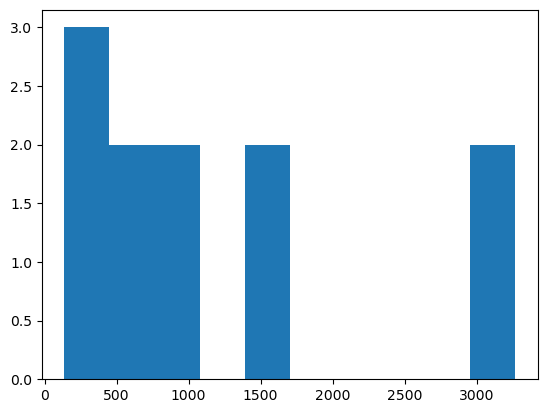

In [4]:
#subsample the oma folders

import os
import shutil
import random
import glob
from tqdm import tqdm
from matplotlib import pyplot as plt

#path to the oma folder
path = '../../../datasets/Structure_Trees_mk2/*/'
#path to the output folder
outpath = '../OMA_data/'

#make the output folder if it does not exist
if not os.path.exists(outpath):
    os.mkdir(outpath)
#number of proteins to sample
min_prots = 10
#number of superfamilies to sample
fams = 2000
superfams={}
#iterate over all superfamilies and compile an identifiers.txt file in the output folder
for clade in glob.glob(path):
    print(clade)
    if clade not in superfams:
        superfams[clade] = {}
    #stores length of each superfam
    superfam = set(glob.glob(clade+'*/'))-set([clade + 'logs/'])
    #use tqdm progress bar
    for s in tqdm(superfam):
        with open(clade+s+'identifiers.txt', 'r') as f:
                nprots = len(f.readlines())
        if nprots >= min_prots:
            superfams[clade][s] = nprots
            
lengths = { c:len(superfams[c]) for c in superfams}
print(lengths)
plt.hist(list(lengths.values()))
plt.show()


In [12]:
cleardata = True
import glob
import shutil

outpaths = ['../OMA_data/' , '../OMA_data_unfiltered/OMA_data/']
for outpath in outpaths:
    print(outpath)
    clades = glob.glob(outpath+'*/')
    print('clades' , clades)
    for clade in clades:
        hogs = glob.glob( clade+'*/')
        print(hogs[0:10])
        for hog in hogs:
            if cleardata == True:
                shutil.rmtree(hog)


../OMA_data/
clades ['../OMA_data/logs/', '../OMA_data/Bacteria/', '../OMA_data/LUCA/', '../OMA_data/Euteleostomi/', '../OMA_data/Eumetazoa/', '../OMA_data/Chordata/', '../OMA_data/Tetrapoda/', '../OMA_data/Opisthokonta/', '../OMA_data/Dikarya/', '../OMA_data/Fungi/', '../OMA_data/Bilateria/', '../OMA_data/Eukaryota/']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
../OMA_data_unfiltered/OMA_data/
clades ['../OMA_data_unfiltered/OMA_data/Bacteria/', '../OMA_data_unfiltered/OMA_data/LUCA/', '../OMA_data_unfiltered/OMA_data/Euteleostomi/', '../OMA_data_unfiltered/OMA_data/Eumetazoa/', '../OMA_data_unfiltered/OMA_data/Chordata/', '../OMA_data_unfiltered/OMA_data/Tetrapoda/', '../OMA_data_unfiltered/OMA_data/Opisthokonta/', '../OMA_data_unfiltered/OMA_data/Dikarya/', '../OMA_data_unfiltered/OMA_data/Fungi/', '../OMA_data_unfiltered/OMA_data/Bilateria/', '../OMA_data_unfiltered/OMA_data/Eukaryota/']
['../OMA_data_unfiltered/OMA_data/Bacteria/HOG569/', '../OMA_data_unfiltered/OMA_data/Bacteria/HOG279/'

In [13]:
minlen = min(list(lengths.values()) )
print(minlen)
#sample the superfamilies
for clade in superfams:
    cladestr = clade.split('/')[-2]+'/'
    if not os.path.isdir(outpath+cladestr):
        os.mkdir(outpath+cladestr)
    print(clade)    
    superfams[clade] = random.sample( list(superfams[clade]) ,  min( len(list(superfams[clade]))  , 500 )  )
    print(len(superfams[clade]))
    for s in tqdm(superfams[clade]):
        #copy the files to the output folder
        superfam = s.split('/')[-2]+'/'
        for outpath in outpaths:
            if not os.path.exists(outpath+cladestr+superfam):
                os.mkdir(outpath+cladestr+superfam)
                shutil.copy(s+'identifiers.txt', outpath+cladestr+superfam+'identifiers.txt')


138
../../../datasets/Structure_Trees_mk2/Bacteria/
500


100%|██████████| 500/500 [00:06<00:00, 78.14it/s] 


../../../datasets/Structure_Trees_mk2/LUCA/
500


100%|██████████| 500/500 [00:06<00:00, 77.97it/s] 


../../../datasets/Structure_Trees_mk2/Euteleostomi/
500


100%|██████████| 500/500 [00:06<00:00, 78.26it/s] 


../../../datasets/Structure_Trees_mk2/Eumetazoa/
500


100%|██████████| 500/500 [00:06<00:00, 75.93it/s]


../../../datasets/Structure_Trees_mk2/Chordata/
500


100%|██████████| 500/500 [00:05<00:00, 93.16it/s] 


../../../datasets/Structure_Trees_mk2/Tetrapoda/
359


100%|██████████| 359/359 [00:02<00:00, 126.22it/s]


../../../datasets/Structure_Trees_mk2/Opisthokonta/
500


100%|██████████| 500/500 [00:04<00:00, 113.67it/s]


../../../datasets/Structure_Trees_mk2/Dikarya/
186


100%|██████████| 186/186 [00:01<00:00, 118.58it/s]


../../../datasets/Structure_Trees_mk2/Fungi/
138


100%|██████████| 138/138 [00:01<00:00, 98.20it/s] 


../../../datasets/Structure_Trees_mk2/Bilateria/
500


100%|██████████| 500/500 [00:04<00:00, 108.82it/s]


../../../datasets/Structure_Trees_mk2/Eukaryota/
500


100%|██████████| 500/500 [00:04<00:00, 103.93it/s]
